Fitting with user-defined functions
===

There are numerous ways to express functions in ROOT (https://root.cern.ch/doc/master/classTF1.html) in this example we'll explore a general method of defining fit functions.  Again we will use the ROOT fitting framework for the next couple of exercies to illustrate some general featues of the non-linear fitting problems.  Some of the examples we see may be replicated in scipy.optimize, but not neceassarily all of them.

ROOT classes used here:
* [TF1](https://root.cern.ch/doc/master/classTF1.html): 1D function
* [TH1F](https://root.cern.ch/doc/master/classTH1.html): 1D histogram (the content of each bin is described by a float)

In [ ]:
import ROOT as r
%jsroot off

First we define a function and store it in a TF1 object.  In this example we will use Pythonic interfaces, next time we'll see how the same patterns can be used in C++.

In [3]:
from math import pow, exp

# A function producing two peaks on top of an exponentialy 
# falling background.  Depends on several parameters.
# Generic interface for fcn of n input-values and m parameters
# Functions with this interface may be used to construct a "TFunction" or TF1
# vx is the independent value(s): array like
# p is the parameter value(s): array like

def myfunction(vx, par):
    x=vx[0]
    # background model
    bkgScale=par[0]
    alpha=par[1]
    beta=par[2]
    background = pow(x/beta,-1.0*alpha)
    # first peak, Gaussian model
    A1=par[3]
    mu1=par[4]
    sig1=par[5]
    peak1=A1*exp(-0.5*(x-mu1)*(x-mu1)/sig1/sig1)
    # second peak, Gaussian model
    A2=par[6]
    mu2=par[7]
    sig2=par[8]
    peak2=A2*exp(-0.5*(x-mu2)*(x-mu2)/sig2/sig2)
    return bkgScale*background+peak1+peak2

xrange=(300,1000)
f1 = r.TF1("f1",myfunction,xrange[0],xrange[1],9)  # xrange 300<=x<=1000, there are 9 parameters in this function
f1.SetNpx(500)  # use large number of points in drawing function to resolve small details better
f1.SetParameters(1e9,4.7,40,5000,490,2,1200,800,25)  # define the parameters
f1.SetParNames("BkgScale","alpha","beta","A1","mu1","sig1","A2","mu2","sig2")  # optional, but nice

TypeError: Template method resolution failed:
  none of the 8 overloaded methods succeeded. Full details:
  TF1::TF1(const TF1& f1) =>
    TypeError: takes at most 1 arguments (5 given)
  TF1::TF1() =>
    TypeError: takes at most 0 arguments (5 given)
  bad argument type for built-in operation
  must be real number, not function
  bad argument type for built-in operation
  TF1::TF1(const char* name, Double_t(*)(Double_t*,Double_t*) fcn, Double_t xmin = 0, Double_t xmax = 1, Int_t npar = 0, Int_t ndim = 1, TF1::EAddToList addToGlobList = EAddToList::kDefault) =>
    TypeError: could not convert argument 2
  TF1::TF1(const char* name, Double_t(*)(const Double_t*,const Double_t*) fcn, Double_t xmin = 0, Double_t xmax = 1, Int_t npar = 0, Int_t ndim = 1, TF1::EAddToList addToGlobList = EAddToList::kDefault) =>
    TypeError: could not convert argument 2
  TF1::TF1(const char* name, ROOT::Math::ParamFunctor f, Double_t xmin = 0, Double_t xmax = 1, Int_t npar = 0, Int_t ndim = 1, TF1::EAddToList addToGlobList = EAddToList::kDefault) =>
    TypeError: could not convert argument 2
  Failed to instantiate "TF1(std::string,function,int,int,int)"

In file included from input_line_61:1:
/sfs/ceph/standard/phys56xx/miniforge3/envs/phys56xx/include/CPyCppyy/API.h:15:10: fatal error: 'stdio.h' file not found
#include <stdio.h>
         ^~~~~~~~~
In file included from input_line_62:1:
/sfs/ceph/standard/phys56xx/miniforge3/envs/phys56xx/include/CPyCppyy/API.h:15:10: fatal error: 'stdio.h' file not found
#include <stdio.h>
         ^~~~~~~~~
In file included from input_line_63:1:
/sfs/ceph/standard/phys56xx/miniforge3/envs/phys56xx/include/CPyCppyy/API.h:15:10: fatal error: 'stdio.h' file not found
#include <stdio.h>
         ^~~~~~~~~
In file included from input_line_64:1:
/sfs/ceph/standard/phys56xx/miniforge3/envs/phys56xx/include/CPyCppyy/API.h:15:10: fatal error: 'stdio.h' file not found
#include <stdio.h>
         ^~~~~~~~~


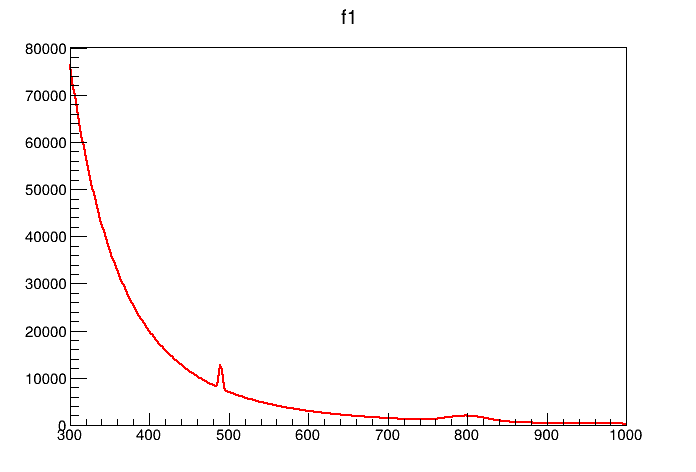

In [3]:
tc=r.TCanvas()
f1.Draw()
tc.Draw()

Generate random data according to this distribution

In [4]:
entries=100000
ranHist1 = r.TH1F("ranHist1", "Random Histogram for my PDF;x;entries",500,xrange[0],xrange[1]);
ranHist1.FillRandom("f1",entries)

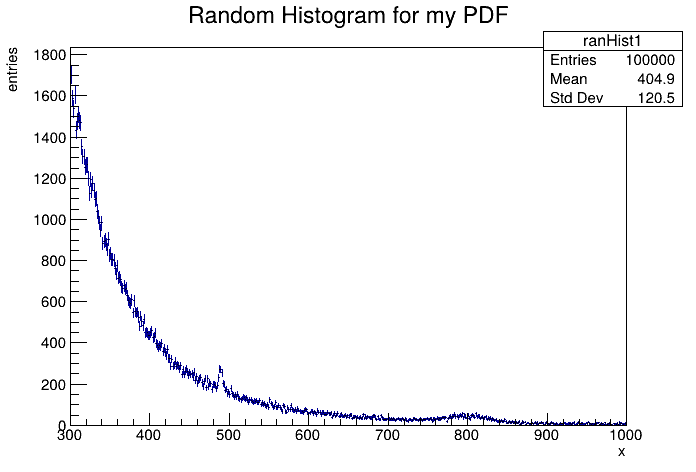

In [5]:
ranHist1.Draw("e")
tc.Draw()

 Now "pretend" that we don't know the paramaters used to generate the data.
 
 All fits begin with initial guesses at the best parameter values

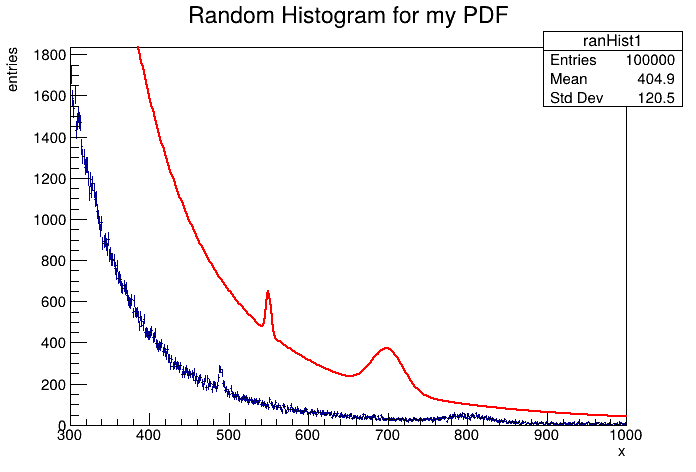

In [6]:
f1.SetParameters(1e6,4,80,200,550,3,200,700,20)
ranHist1.Draw("e")
f1.Draw("same")
tc.Draw()

To get better qualitative agreement try:

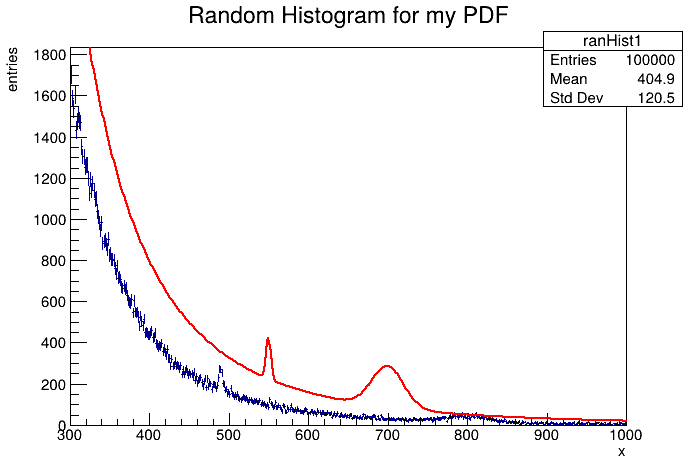

In [7]:
f1.SetParameters(0.5e6,4,80,200,550,3,200,700,20)
ranHist1.Draw("e")
f1.Draw("same")
tc.Draw()

Try to fit the function to the data:

In [8]:
result=ranHist1.Fit(f1,"E")
f1=ranHist1.GetFunction("f1")

****************************************
         Invalid FitResult  (status = 2 )
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      1181.69
NDf                       =          491
Edm                       =  3.06436e-07
NCalls                    =         1931
BkgScale                  =       605910   +/-   0           
alpha                     =      4.60207   +/-   0           
beta                      =      83.6329   +/-   0           
A1                        =      201.214   +/-   0           
mu1                       =      552.824   +/-   0           
sig1                      =  -0.00894786   +/-   0           
A2                        =     -6.77557   +/-   0           
mu2                       =      599.954   +/-   0           
sig2                      =     -62.4899   +/-   0           


Warning in <Fit>: Abnormal termination of minimization.


Notice that there is a problem here. <br>
Look at the result:

chi^2: 1181.6921962460247, nDOF: 491, p-value: 8.181133575456766e-59


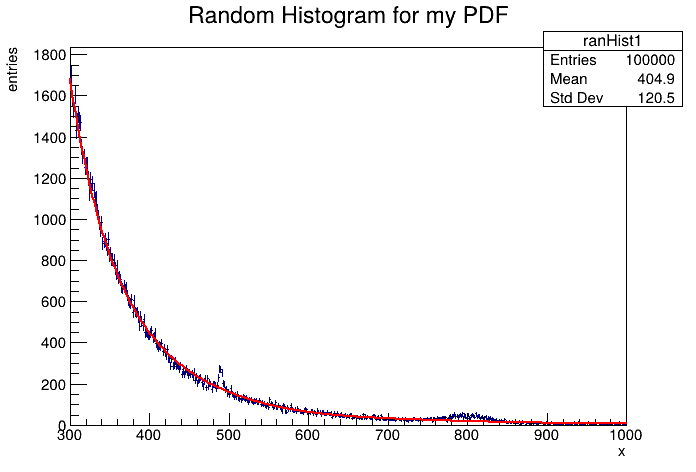

In [9]:
print(f'chi^2: {f1.GetChisquare()}, nDOF: {f1.GetNDF()}, p-value: {f1.GetProb()}')
ranHist1.Draw("e")
f1.Draw("same")
tc.Draw()

Did the fit work? Did it find both peaks? Probably not. In general, you can't count on complex fits to converge without carefully adjusting the starting parameters. Sure, in this example, you could peek at the parameters used to generate the data, but that's not an option in the real world. Go through the process of adjusting the parameters and replotting the function to get a better representation of the data. Then try a fit and see if you can extract the parameters describing the peeks.

In [10]:
# extract the parameters and their (parabolic) errors
popt = []
perr = []
for i in range(f1.GetNpar()):
    popt.append(f1.GetParameter(i))
    perr.append(f1.GetParError(i))
    print(f'f1.GetParName(i): {popt[i]:10.2f} +- {perr[i]:10.2f}')

f1.GetParName(i):  605910.14 +-       0.00
f1.GetParName(i):       4.60 +-       0.00
f1.GetParName(i):      83.63 +-       0.00
f1.GetParName(i):     201.21 +-       0.00
f1.GetParName(i):     552.82 +-       0.00
f1.GetParName(i):      -0.01 +-       0.00
f1.GetParName(i):      -6.78 +-       0.00
f1.GetParName(i):     599.95 +-       0.00
f1.GetParName(i):     -62.49 +-       0.00


For you to try
===
In the file datadist.root you will find a histogram representing data from an unknown distribution.

* Develop your own fitting function/model and see how well you can fit this distribution. 
* You may need to try a variety of functions.
* Include a plot of your best fit at the bottom of this notebook.
* Include your p-value for the best fit and describe how you settled on this fit versus others.
* Show your best fit parameters and their errors
* Plot the fit residuals, eg for each bin plot (fit-data)/data_uncertianty.  For a good fit the points should randomy fluctuate around 0 (eg no large, contiguous regions above or below 0)
* Plot the pull distribution (for a good fit this should be consisten with a normal distribution w/ $\mu=0,\sigma=1$

For this notebook it is assumed that you'll work with ROOT.

I saved my plots to result.pdf and result2.pdf using root on the terminal since I could not get ROOT to work in this notebook. result.pdf is for a gaussian plus a constant background while result2.pdf is fitting with a gaussian with a linear background. The latter provides better results, with a smaller chi2 of 1.2 and larger p-value of 0.18. My residuals also appear to match a normal distribution with a mean of 0.10 and sigma of 1.34. The following are the parameters and their errors:


0       -51.2993 +- 114.398 <- background

1       -17.1012 +- 16.4366 <- slope 

2       291.989 +- 290.721 <- amplitude 

4       6.70314 +- 2.62662 <- sigma 



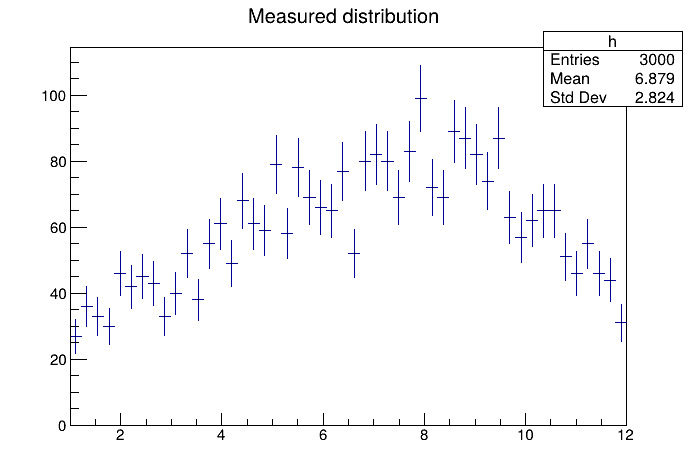

In [11]:
tf=r.TFile("datadist.root")
hist=tf.Get("h")
tc=r.TCanvas()
hist.Draw()
tc.Draw()

In [12]:
# your work here